In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets



In [7]:
iris = datasets.load_iris()
iris_data=pd.DataFrame(iris.data)
iris_data.columns=iris.feature_names

In [8]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
x_scaled = scaler.fit_transform(iris_data)

In [11]:
x_scaled.shape

(150, 4)

pca to convert 4 features into 2 feautres bt dimesinality reduction bt pca

In [12]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [15]:
pca_scaled=pca.fit_transform(x_scaled)

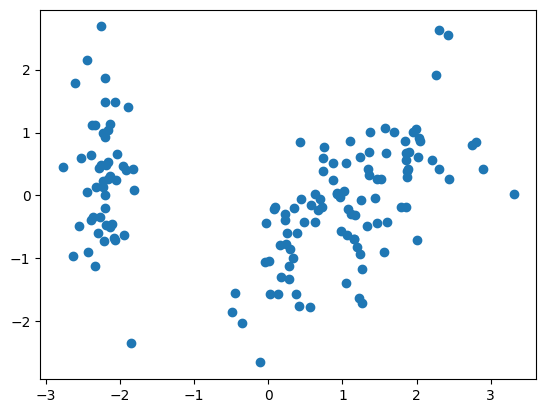

In [16]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

agglomerative clsutring

Text(0, 0.5, 'eucaledian dist')

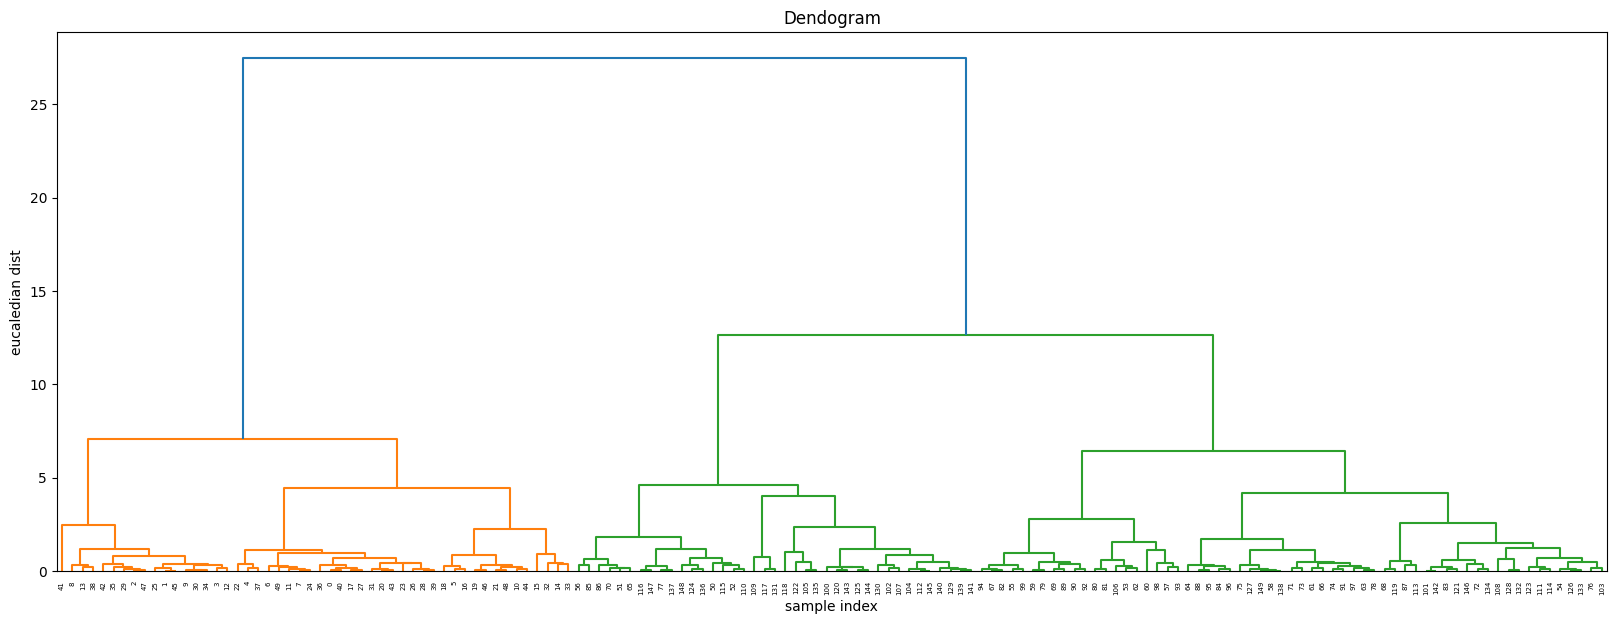

In [19]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title('dendogram')

## create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward')) ## imp line
plt.title('Dendogram')
plt.xlabel('sample index')
plt.ylabel('eucaledian dist')

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,  linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [24]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

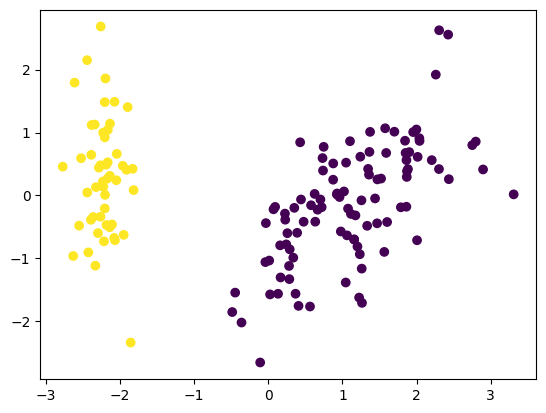

In [25]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [26]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,linkage='ward')
    agglo.fit(x_scaled)
    score=silhouette_score(x_scaled,agglo.labels_)
    silhouette_coefficients.append(score)

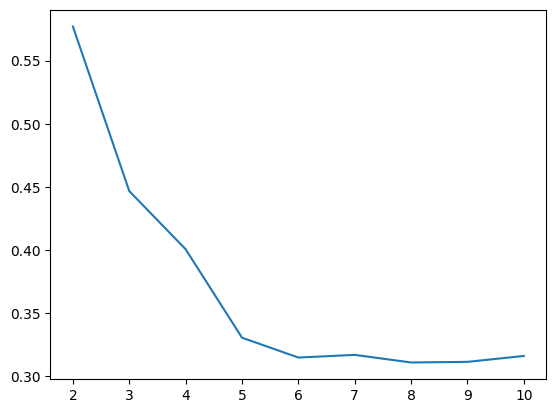

In [27]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.show()